# load python libraries 

In [1]:
%matplotlib inline

from ipywidgets import interact, interactive, IntSlider, FloatSlider
from IPython.display import clear_output, display, HTML

from numpy import *
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

# interactive Exposure

In [3]:
years = arange(0,101,1)

def Exposure(maximal_consumption, age_of_onset, age_of_quitting,
             time_to_max_exposure, time_to_complete_quitting):
    
    sigma_1 = time_to_max_exposure / 4 # (years) duration of the transition from no-smoking to smoking
    sigma_2 = time_to_complete_quitting / 4 # (years) duration of the transition from smoking to no-smoking
    t_1 = age_of_onset + 2 * sigma_1 # (years) time to 50% of maximal exposure after starting to smoke
    t_2 = age_of_quitting - 2 * sigma_1 # (years) time to 50% of maximal exposure when quitting
    
    def value(years, maximal_consumption,
               time_to_complete_quitting, age_of_quitting, 
               sigma_1, sigma_2, t_1, t_2):        
        if (time_to_complete_quitting == 130 | age_of_quitting == 130):
            return maximal_consumption * (1 / ( 1+exp( -(years-t_1)/sigma_1 ) ))  
        else:
            return maximal_consumption *  (1 / ( 1+exp( -(years-t_1)/sigma_1 ) )) * (1 / ( 1+exp(  (years-t_2)/sigma_2 ) )) 
  
    values = value(years, maximal_consumption,
               time_to_complete_quitting, age_of_quitting, 
               sigma_1, sigma_2, t_1, t_2)
    
    plt.plot(years, values)    
    plt.show()
    return years, values

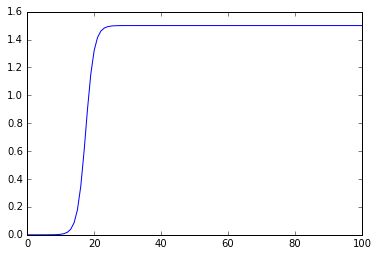

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([  1.24729204e-06,   2.77589666e-06,   6.17785762e-06,
          1.37490056e-05,   3.05986309e-05,   6.80968031e-05,
          1.51543791e-04,   3.37225155e-04,   7.50301661e-04,
          1.66880405e-03,   3.70893473e-03,   8.22944835e-03,
          1.81926525e-02,   3.98954904e-02,   8.59862638e-02,
          1.78804383e-01,   3.47212825e-01,   6.01968510e-01,
          8.98031490e-01,   1.15278718e+00,   1.32119562e

In [4]:
E = interactive(Exposure, 
                age_of_onset = IntSlider(min=5,max=50,step=1,value=15), # years
                maximal_consumption = FloatSlider(min=0.1,max=5,step=0.1,value=1.5), # packs/day
                time_to_max_exposure = IntSlider(min=1,max=20,step=1,value=5), # years
                age_of_quitting = IntSlider(min=5,max=130,step=1,value=130), # years, 130 is non-quitter
                time_to_complete_quitting = IntSlider(min=5,max=130,step=1,value=130), # years, 130 is non-quitter
               )
display(E)
E_arguments = E.kwargs
years, E_values = E.result

# non interactive EA

In [2]:
def Exposure(maximal_consumption, age_of_onset, age_of_quitting,
             time_to_max_exposure, time_to_complete_quitting):
    return 0

def Activity(exposure_trigger, slope_to_maximal_microphage_activity, 
            persistence_after_quitting): 
    return 0

E = interactive(Exposure, 
                age_of_onset = IntSlider(min=5,max=50,step=1,value=15), # years
                maximal_consumption = FloatSlider(min=0.1,max=5,step=0.1,value=1.5), # packs/day
                time_to_max_exposure = IntSlider(min=1,max=20,step=1,value=5), # years
                age_of_quitting = IntSlider(min=5,max=130,step=1,value=130), # years, 130 is non-quitter
                time_to_complete_quitting = IntSlider(min=5,max=130,step=1,value=130), # years, 130 is non-quitter
               )
display(E)

A = interactive(Activity, 
                exposure_trigger = IntSlider(min= 0.1,max=1,step=0.1,value=0.3), # pack/day
                slope_to_maximal_microphage_activity = FloatSlider(min=1,max=3,step=0.25,value=2), # 
                persistence_after_quitting = IntSlider(min=0,max=101,step=1,value=96) # % of Macrophage activity, 101 is non-quitter
               )
display(A)

0

In [10]:
# E parameters
E_max = E.kwargs['maximal_consumption']
time_to_complete_quitting = E.kwargs['time_to_complete_quitting']
time_to_max_exposure = E.kwargs['time_to_max_exposure']
age_of_onset = E.kwargs['age_of_onset']
age_of_quitting = E.kwargs['age_of_quitting']
sigma_1 = time_to_max_exposure / 4
sigma_2 = time_to_complete_quitting / 4
t_1 = age_of_onset + 2 * sigma_1
t_2 = age_of_quitting - 2 * sigma_1

# A parameters
exposure_trigger = A.kwargs['exposure_trigger']
slope_to_maximal_microphage_activity = A.kwargs['slope_to_maximal_microphage_activity']
persistence_after_quitting = A.kwargs['persistence_after_quitting']
tau_A = 2
A_inf = persistence_after_quitting / 100
sigma_e = 0.25 * E_max / slope_to_maximal_microphage_activity
E_1 = exposure_trigger + 2 * sigma_e
    
def E_t(t):
    if (time_to_complete_quitting == 130 | age_of_quitting == 130):
        return E_max * (1 / ( 1+exp( -(t-t_1)/sigma_1 ) ))  
    else:
        return E_max * (1 / ( 1+exp( -(t-t_1)/sigma_1 ) )) * (1 / ( 1+exp(  (t-t_2)/sigma_2 ) )) 

def A_ss(t):
        return 1 / (1+exp( -(E_t(t)-E_1)/sigma_e ))  
    
def derivative_of_A(y, t):
    return (-y + (1-A_inf)*A_ss(t) + A_inf) / tau_A

In [11]:
years = arange(0,101,1)

In [12]:
E_values = E_t(years)

In [20]:
A_values = integrate.odeint(derivative_of_A, 0, years)

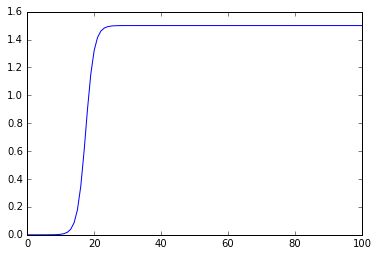

In [14]:
plt.plot(years, E_values) 

(0, 1.1)

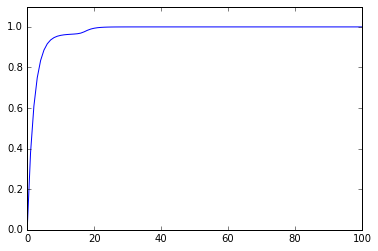

In [19]:
plt.plot(years, A_values)
plt.ylim([0,1.1])

# interactive Activity

In [31]:
def Activity_plot(exposure_trigger, slope_to_maximal_microphage_activity, 
            persistence_after_quitting): # Macrophage activity

    A_values = integrate.odeint(derivative_of_A, 0, years)
    plt.plot(years, A_values)    
    plt.show()
    return years, A_values

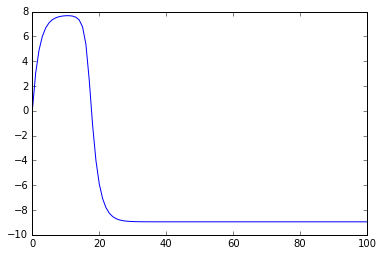

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([[ 0.        ],
        [ 3.04353395],
        [ 4.88952049],
        [ 6.00914539],
        [ 6.68818201],
        [ 7.09992689],
        [ 7.34941429],
        [ 7.50018284],
        [ 7.59039668],
        [ 7.64236873],
        [ 7.66776297],
        [ 7.66943544],
        [ 7.6394456 ],
        [ 7.55006808],
        [ 7.32701837],
        [ 6.77095593],
        [ 5.37434587],
        [ 2.48097159],
        [-1.135

In [32]:
A = interactive(Activity_plot, 
                exposure_trigger = IntSlider(min= 0.1,max=1,step=0.1,value=0.3), # pack/day
                slope_to_maximal_microphage_activity = FloatSlider(min=1,max=3,step=0.25,value=2), # 
                persistence_after_quitting = IntSlider(min=0,max=101,step=1,value=96) # % of Macrophage activity, 101 is non-quitter
               )
display(A)